In [43]:
# Import de librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [44]:
# Import des donnée et exploration
X = pd.read_csv('Data_X.csv')
Y = pd.read_csv('Data_Y.csv')
print("Longueur des données : ", len(X))
print(Y.head())
print(X.head())

Longueur des données :  1494
     ID    TARGET
0  1054  0.028313
1  2049 -0.112516
2  1924 -0.180840
3   297 -0.260356
4  1101 -0.071733
     ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE   
0  1054     206      FR        0.210099       -0.427458       -0.606523  \
1  2049     501      FR       -0.022399       -1.003452       -0.022063   
2  1924     687      FR        1.395035        1.978665        1.021305   
3   297     720      DE       -0.983324       -0.849198       -0.839586   
4  1101     818      FR        0.143807       -0.617038       -0.924990   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...   
0        0.606523            NaN       0.692860            NaN  ...  \
1        0.022063      -0.573520      -1.130838       0.573520  ...   
2       -1.021305      -0.622021      -1.682587       0.622021  ...   
3        0.839586      -0.270870       0.563230       0.270870  ...   
4        0.924990            NaN       0.990324          

In [45]:
# Vérifier s’il y a des valeurs manquantes dans les données.
# Retirer les lignes avec des valeurs manquantes, et les lignes de prix correspondantes
# Pour cela, on commence par concaténer les deux jeux de données
XY = pd.concat([X,Y], axis=1)
XY = XY.drop(['COUNTRY'], axis=1) # On supprime la colonne COUNTRY, j'ai pas compris pourquoi elle était là et plus elle est chiante parce que c'est des strings
print("Data longueur : ", len(XY))
# On retire les lignes avec des valeurs manquantes
XY = XY.dropna()
print("Data longueur sans les lignes manquantes: ", len(XY))
# On retire les lignes dupliquées
XY = XY.drop_duplicates()
print("Data longueur sans les lignes dupliquées: ", len(XY))
# On cherche maintenant à retirer les valeurs aberrantes
print("Ecart type des valeurs de XY :")
print(XY.std(numeric_only = True)) # Ecart type avant les valeurs aberrantes
XY = XY[(np.abs(stats.zscore(XY)) < 3).all(axis=1)]
print("Data longueur sans les valeurs aberrantes: ", len(XY))
# On affiche les valeurs moyennes et les écarts types
print("Moyenne des valeurs de XY :")
print(XY.mean(numeric_only = True))
print("Ecart type des valeurs de XY :")
print(XY.std(numeric_only = True)) # Ecart type après les valeurs aberrantes
# On sépare ensuite les deux jeux de données
X = XY.iloc[:,:-2]
Y = XY.iloc[:,-2:]
print("X, : \n", X.head())
print("Y : \n", Y.head())
# Vérifier si les valeurs des différents attributs sont comparables

Data longueur :  1494
Data longueur sans les lignes manquantes:  1276
Data longueur sans les lignes dupliquées:  1276
Ecart type des valeurs de XY :
ID                  647.608506
DAY_ID              342.278568
DE_CONSUMPTION        0.667052
FR_CONSUMPTION        0.862587
DE_FR_EXCHANGE        0.978287
FR_DE_EXCHANGE        0.978287
DE_NET_EXPORT         0.966510
FR_NET_EXPORT         1.100724
DE_NET_IMPORT         0.966510
FR_NET_IMPORT         1.100724
DE_GAS                0.826516
FR_GAS                0.884764
DE_COAL               0.821300
FR_COAL               0.459777
DE_HYDRO              1.065549
FR_HYDRO              0.951453
DE_NUCLEAR            0.923464
FR_NUCLEAR            0.947727
DE_SOLAR              1.088409
FR_SOLAR              1.099546
DE_WINDPOW            1.073978
FR_WINDPOW            1.186215
DE_LIGNITE            0.804755
DE_RESIDUAL_LOAD      0.830819
FR_RESIDUAL_LOAD      0.837382
DE_RAIN               0.996052
FR_RAIN               1.056972
DE_WIND       

<Figure size 640x480 with 0 Axes>

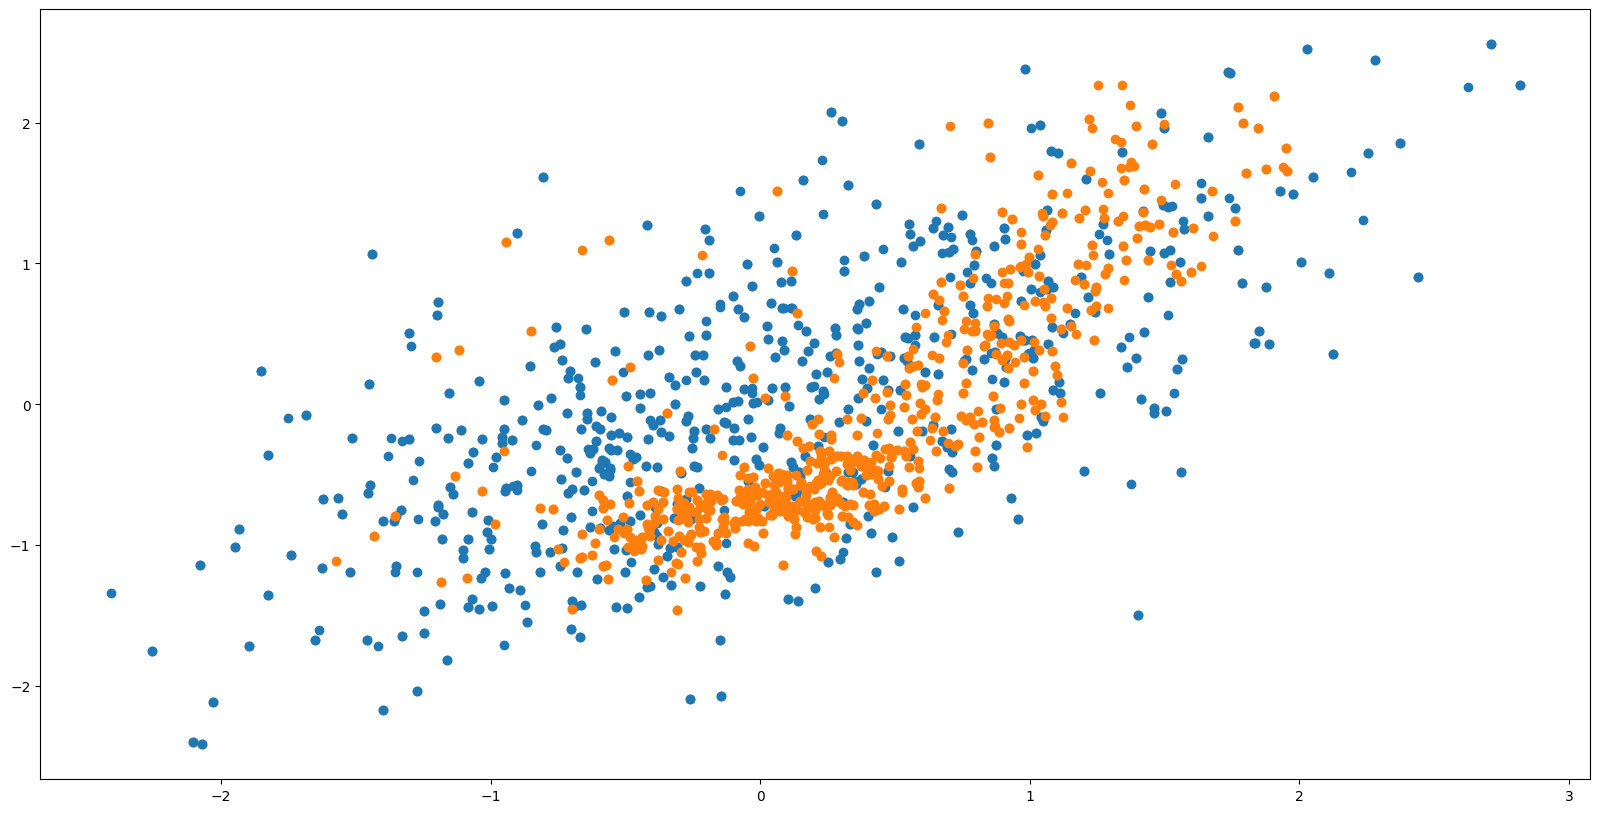

In [52]:
plt.figure()
# élargir le plot
plt.figure(figsize=(20,10))
#plt.plot(range(len(X1)),X1["FR_TEMP"])
#plt.plot(range(len(X1)),X1["FR_CONSUMPTION"])
#plt.title("X1")
plt.scatter(X["FR_TEMP"],X["DE_TEMP"])
plt.scatter(X["DE_CONSUMPTION"],X["FR_CONSUMPTION"])
plt.show()


                        ID    DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION   
ID                1.000000 -0.006758        0.025647       -0.014892  \
DAY_ID           -0.006758  1.000000        0.015503        0.049319   
DE_CONSUMPTION    0.025647  0.015503        1.000000        0.791242   
FR_CONSUMPTION   -0.014892  0.049319        0.791242        1.000000   
DE_FR_EXCHANGE    0.205795  0.029923        0.441795        0.493568   
FR_DE_EXCHANGE   -0.205795 -0.029923       -0.441795       -0.493568   
DE_NET_EXPORT     0.036657  0.050146        0.575968        0.584242   
FR_NET_EXPORT    -0.244843  0.012773       -0.073738       -0.137327   
DE_NET_IMPORT    -0.036657 -0.050146       -0.575968       -0.584242   
FR_NET_IMPORT     0.244843 -0.012773        0.073738        0.137327   
DE_GAS           -0.080256 -0.022727        0.166345        0.290057   
FR_GAS            0.056273  0.011932        0.626802        0.760481   
DE_COAL           0.158002 -0.002138        0.482927        0.46

<Figure size 640x480 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

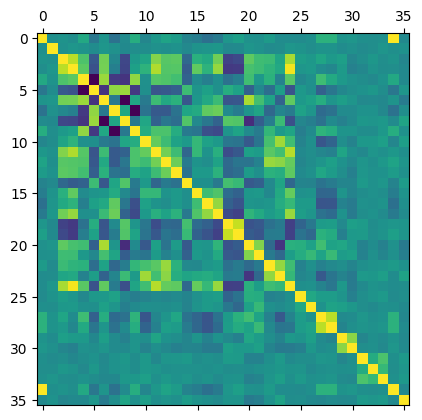

In [54]:
# On cherche maintenant à trouver les variables les plus corrélées avec le prix
# On commence par concaténer les deux jeux de données
XY = pd.concat([X,Y], axis=1)
# On calcule la matrice de corrélation
corr = XY.corr()
# On affiche la matrice de corrélation
print(corr)
# On affiche la matrice de corrélation sous forme de heatmap
plt.figure()
# élargir le plot
plt.figure(figsize=(20,10))
plt.matshow(corr)
plt.show()


In [56]:
# On cherche maintenant à trouver les variables les plus corrélées avec le prix
# On affiche les variables les plus corrélées avec le prix
print("Variables les plus corrélées avec le prix :")
print(corr["TARGET"].sort_values(ascending=False)[:6])
# On prend les 6 valeurs les plus corellées pour faire une regression linéaire

Variables les plus corrélées avec le prix :
TARGET              1.000000
DE_NET_IMPORT       0.167214
DE_RESIDUAL_LOAD    0.154821
DE_GAS              0.117450
DE_HYDRO            0.104610
GAS_RET             0.084136
CARBON_RET          0.081371
COAL_RET            0.050785
FR_DE_EXCHANGE      0.050664
FR_SOLAR            0.038654
Name: TARGET, dtype: float64
